Load data set

In [1]:
#We would only be using petal length and sepal length as our predictors
from sklearn import datasets
import numpy as np 
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

#Split dataset into two for training and testing purposes. 70% of randomly
#selected data is used for training and 30% of randomly selected data is
#used for testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
    random_state = 0)

#Standardize feature of training and testing set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/admin/anaconda3/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


Create function to plot decision boundaries /regions for different classifiers

In [5]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
        np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot all samples
    X_test, y_test = X[test_idx ,] ,y[test_idx, ]
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c1, 0], y = X[y == c1, 1], 
            alpha = 0.8, c = cmap(idx), marker = markers[idx], label = c1)

    #highlight test samples
    if test_idx:
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '', 
            alpha = 1.0, linewidth = 1, marker = 'o', 
            s = 55, label = 'test set')

Model1: Perceptron Model

Misclassified samples: 4
Accuracy: 0


/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


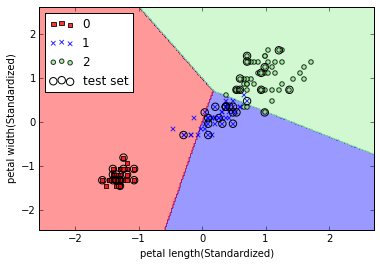

In [7]:
%matplotlib inline
#create and fit the model
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)

#predict output on test set
y_pred = ppn.predict(X_test_std)
print ('Misclassified samples: %d' %(y_test != y_pred).sum())
print ('Accuracy: %d' %accuracy_score(y_test, y_pred))

#plot decision boundary and observations of dataset
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier = ppn, 
    test_idx = range(105, 150))
plt.xlabel('petal length(Standardized)')
plt.ylabel('petal width(Standardized)')
plt.legend(loc = 'upper left')
plt.show()

Check out sigmoid function before diving into logistic regression

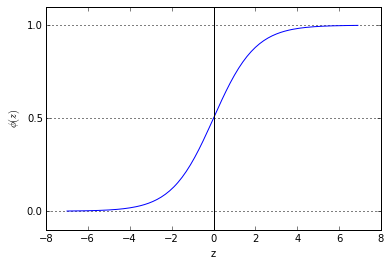

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.axhspan(0.0, 1.0, facecolor = '1.0', alpha = 1.0, ls = 'dotted')
plt.axhline(y = 0.5, ls = 'dotted', color = 'k')
plt.yticks ([0.0, 0.5, 1.0])
plt.ylim (-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z) $')
plt.show()

Model2: Logistic Regression

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


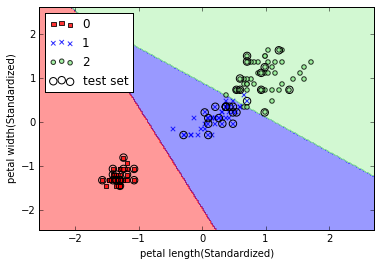

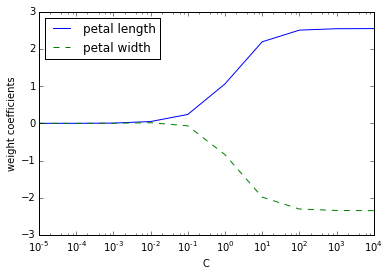

In [12]:
#create and fit the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)

#predict output on test set
lr.predict_proba(X_test_std[0, :])

#plot decision boundary and observations of dataset
plot_decision_regions(X_combined_std, y_combined, classifier = lr, 
    test_idx = range(105, 150))
plt.xlabel('petal length(Standardized)')
plt.ylabel('petal width(Standardized)')
plt.legend(loc = 'upper left')
plt.show()

#plotting impact of regularization on classification
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10**c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = 'petal length')
plt.plot(params, weights[:, 1], label = 'petal width', linestyle = '--')
plt.ylabel('weight coefficients')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

Model3 : Support Vector Machines (SVM)

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


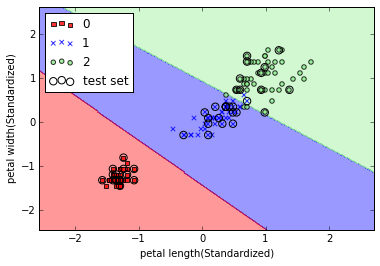

In [15]:
from sklearn.svm import SVC
svm = SVC(C = 1.0, kernel = 'linear', random_state = 0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm, 
    test_idx = range(105, 150))
plt.xlabel('petal length(Standardized)')
plt.ylabel('petal width(Standardized)')
plt.legend(loc = 'upper left')
plt.show()

Alternative implementations of Perceptron, logistic regression and SVM using scikit-learn

In [16]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

Training SVM on non-linear dataset

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


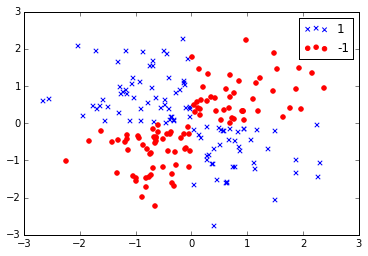

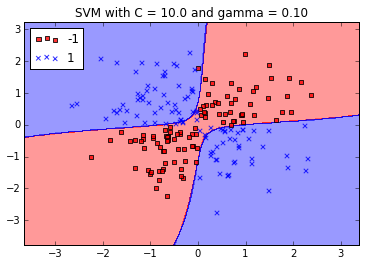

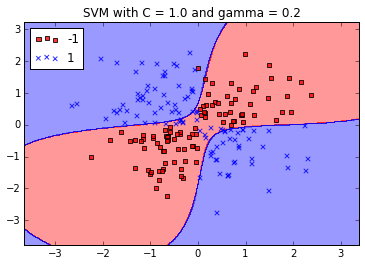

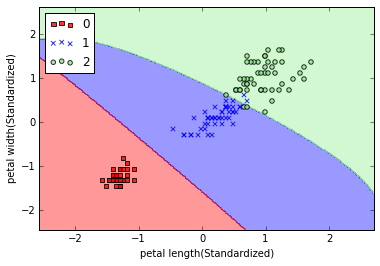

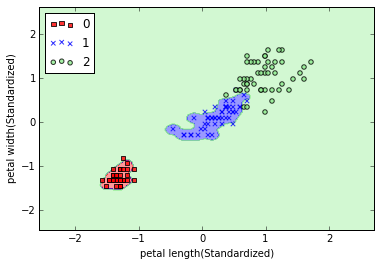

In [19]:
#create non-linear dataset
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], 
	color = 'blue', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], 
	color = 'red', marker = 'o', label = '-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

#train SVM model and plot decision regions
svm = SVC(C = 10.0, gamma = 0.10, kernel = 'rbf', random_state = 0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.title('SVM with C = 10.0 and gamma = 0.10')
plt.legend(loc = 'upper left')
plt.show()

svm = SVC(C = 1.0, gamma = 0.2, kernel = 'rbf', random_state = 0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.title('SVM with C = 1.0 and gamma = 0.2')
plt.legend(loc = 'upper left')
plt.show()

#train SVM model on iris dataset with small value of gamma
svm = SVC(C = 1.0, gamma = 0.2, kernel = 'rbf', random_state = 0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm)
plt.xlabel('petal length(Standardized)')
plt.ylabel('petal width(Standardized)')
plt.legend(loc = 'upper left')
plt.show()

#train SVM model on iris dataset with larger value of gamma
svm = SVC(C = 1.0, gamma = 100.0, kernel = 'rbf', random_state = 0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = svm)
plt.xlabel('petal length(Standardized)')
plt.ylabel('petal width(Standardized)')
plt.legend(loc = 'upper left')
plt.show()

Model4: Decision Trees

Compute and plot entropy, gini and misclassification error for an example dataset

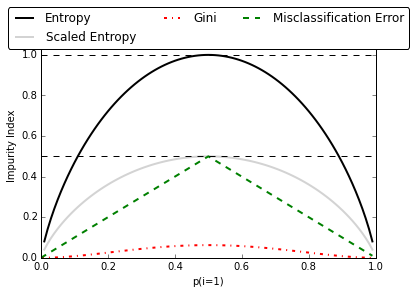

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return (p * (1-p)) ** 2

def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2(1-p)

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(p) for p in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
    ['Entropy', 'Scaled Entropy', 'Gini', 'Misclassification Error', ], 
    ['-', '-', '-.', '--'], 
    ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, 1.15),
    ncol=3, fancybox=True, shadow=False)    
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

Model 5: Decision Trees using scikit-learn

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


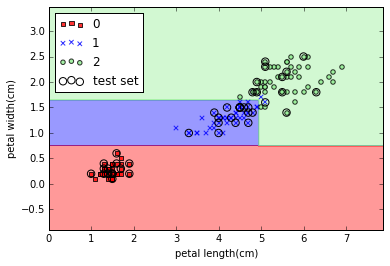

In [25]:
#train decision tree model and plot decision boundary of classifier with all observations
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier = tree, test_idx=range(105, 150))
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
plt.legend(loc = 'upper left')
plt.show()

#plot tree model
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', feature_names = ['petal length', 'petal width'])

Model 6: Random forest

/Users/admin/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/admin/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/admin/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/admin/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
/Users/admin/anaconda3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use insp

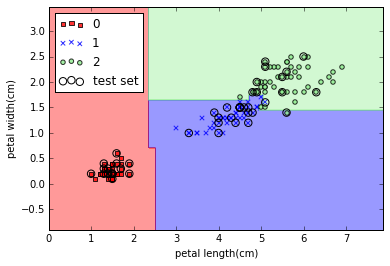

In [26]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', 
                               n_estimators = 10, random_state = 1, n_jobs = 2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier = forest, test_idx=range(105, 150))
plt.xlabel('petal length(cm)')
plt.ylabel('petal width(cm)')
plt.legend(loc = 'upper left')
plt.show()

Model 7: k-Nearest Neighbors

/Users/admin/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


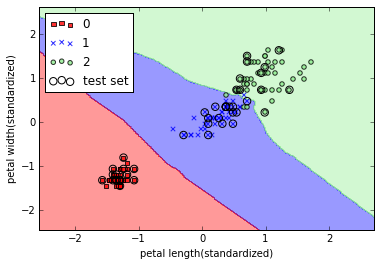

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier = knn, test_idx=range(105, 150))
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.legend(loc = 'upper left')
plt.show()